In [6]:
catalog


'source_hdb_resale_prices': kedro_datasets.pandas.csv_dataset.CSVDataset
'source_mrt_stations': kedro_datasets.pandas.excel_dataset.ExcelDataset
'source_hdb_address_geodata': kedro_datasets.pandas.csv_dataset.CSVDataset
'source_mrt_geodata': kedro_datasets.api.api_dataset.APIDataset
'source_mall_geodata': kedro_datasets.api.api_dataset.APIDataset
'staging_hdb_resale_prices': kedro_datasets.pandas.csv_dataset.CSVDataset
'staging_mrt_stations': kedro_datasets.pandas.excel_dataset.ExcelDataset
'staging_hdb_address_geodata': kedro_datasets.pandas.csv_dataset.CSVDataset
'staging_mrt_geodata': kedro_datasets.json.json_dataset.JSONDataset
'staging_mall_geodata': kedro_datasets.json.json_dataset.JSONDataset
'clean_hdb_resale_prices': kedro_datasets.pandas.csv_dataset.CSVDataset
'clean_mrt_stations': kedro_datasets.pandas.csv_dataset.CSVDataset
'clean_hdb_address_geodata': kedro_datasets.pandas.csv_dataset.CSVDataset
'clean_mrt_geodata': kedro_datasets.pandas.csv_dataset.CSVDataset
'clean_mall

In [9]:
hdb_geolocations = catalog.load("clean_hdb_address_geodata")
mrt_geolocations = catalog.load("clean_mrt_geodata")
mall_geolocations = catalog.load("clean_mall_geodata")

[08/28/25 16:36:48] INFO     Loading data from clean_hdb_address_geodata (CSVDataset)...       ]8;id=389929;file://C:\Users\ymekesser\AppData\Local\Programs\Python\Python313\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=451150;file://C:\Users\ymekesser\AppData\Local\Programs\Python\Python313\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from clean_mrt_geodata (CSVDataset)...               ]8;id=199431;file://C:\Users\ymekesser\AppData\Local\Programs\Python\Python313\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=455544;file://C:\Users\ymekesser\AppData\Local\Programs\Python\Python313\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from clean_mall_geodata (CSVDataset)...              ]8;id=949171;file://C:\Users\ymekesser\AppData\Local\Programs\Python\Python313\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=593651;file://C:\Users\ymekesser\AppData\Local\Programs\Python\Python313\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

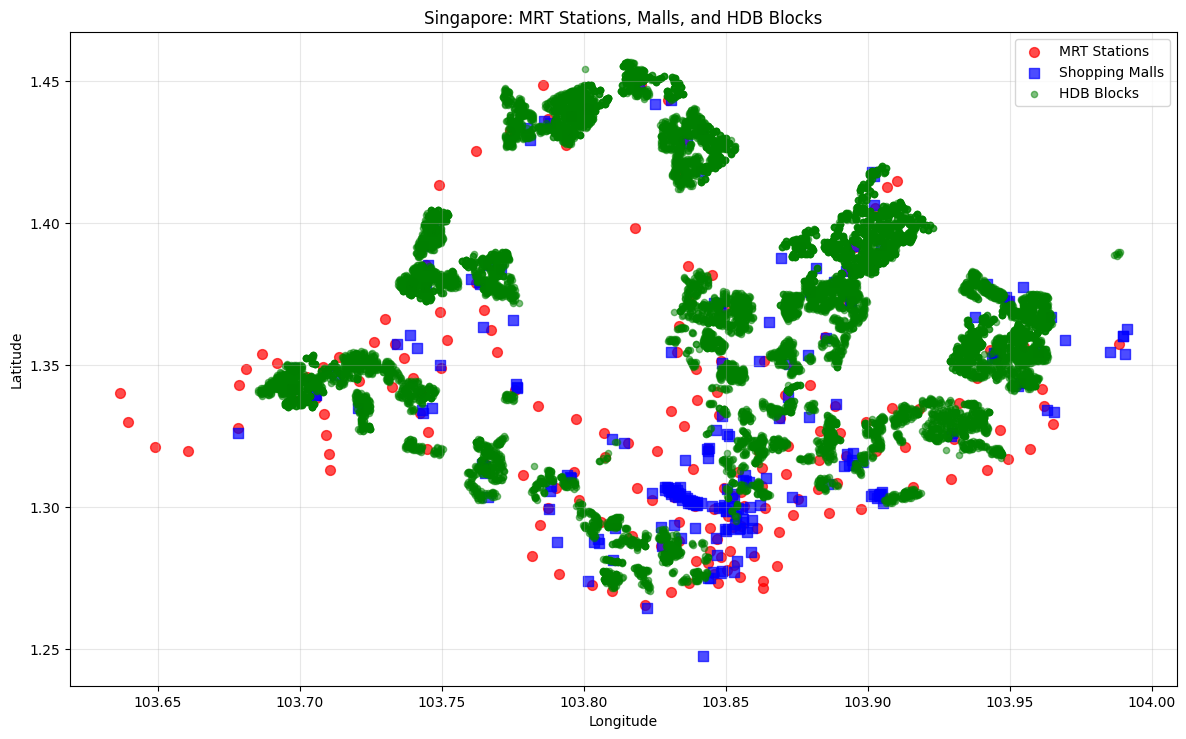

In [10]:
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each dataset
ax.scatter(mrt_geolocations['longitude'], mrt_geolocations['latitude'], 
          c='red', s=50, alpha=0.7, label='MRT Stations')

ax.scatter(mall_geolocations['longitude'], mall_geolocations['latitude'], 
          c='blue', s=60, alpha=0.7, marker='s', label='Shopping Malls')

ax.scatter(hdb_geolocations['longitude'], hdb_geolocations['latitude'], 
          c='green', s=20, alpha=0.5, label='HDB Blocks')

# Formatting
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Singapore: MRT Stations, Malls, and HDB Blocks')
ax.legend()
ax.grid(True, alpha=0.3)

# Set aspect ratio to make it look more like Singapore's shape
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

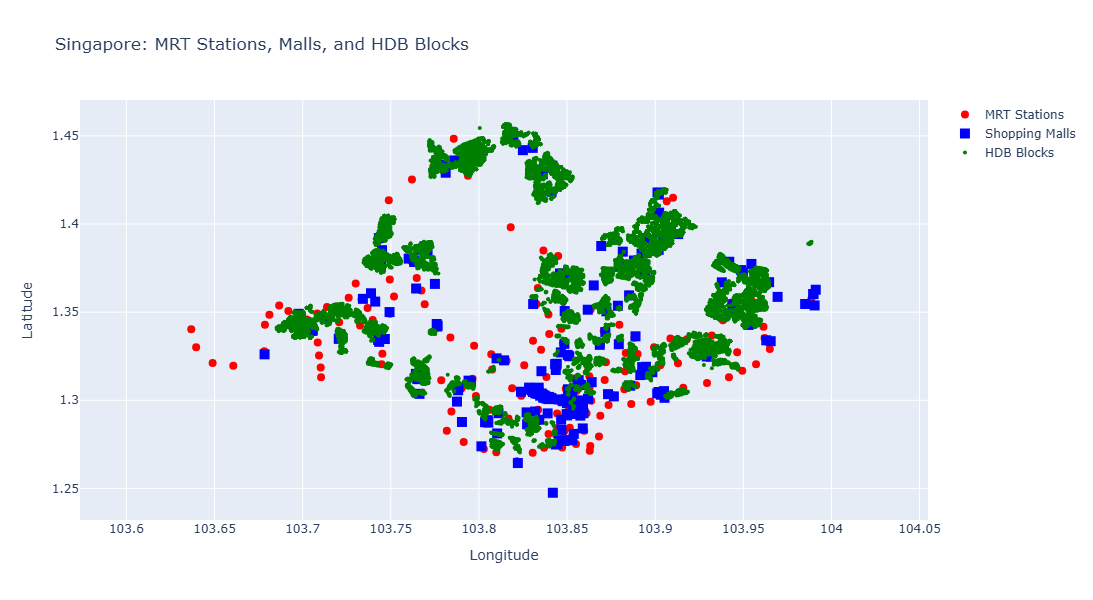

In [12]:
import plotly.express as px
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add MRT stations
fig.add_trace(go.Scatter(
    x=mrt_geolocations['longitude'],
    y=mrt_geolocations['latitude'],
    mode='markers',
    marker=dict(size=8, color='red'),
    name='MRT Stations',
    text=mrt_geolocations['name'],
    hovertemplate='<b>%{text}</b><br>Lat: %{y}<br>Lon: %{x}<extra></extra>'
))

# Add malls
fig.add_trace(go.Scatter(
    x=mall_geolocations['longitude'],
    y=mall_geolocations['latitude'],
    mode='markers',
    marker=dict(size=10, color='blue', symbol='square'),
    name='Shopping Malls',
    text=mall_geolocations['name'],
    hovertemplate='<b>%{text}</b><br>Lat: %{y}<br>Lon: %{x}<extra></extra>'
))

# Add HDB blocks
fig.add_trace(go.Scatter(
    x=hdb_geolocations['longitude'],
    y=hdb_geolocations['latitude'],
    mode='markers',
    marker=dict(size=4, color='green'),
    name='HDB Blocks',
    text=hdb_geolocations['block'] + ' ' + hdb_geolocations['street_name'],
    hovertemplate='<b>%{text}</b><br>Lat: %{y}<br>Lon: %{x}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Singapore: MRT Stations, Malls, and HDB Blocks',
    xaxis_title='Longitude',
    yaxis_title='Latitude',
    width=800,
    height=600
)

# Equal aspect ratio
fig.update_yaxes(scaleanchor="x", scaleratio=1)

fig.show()

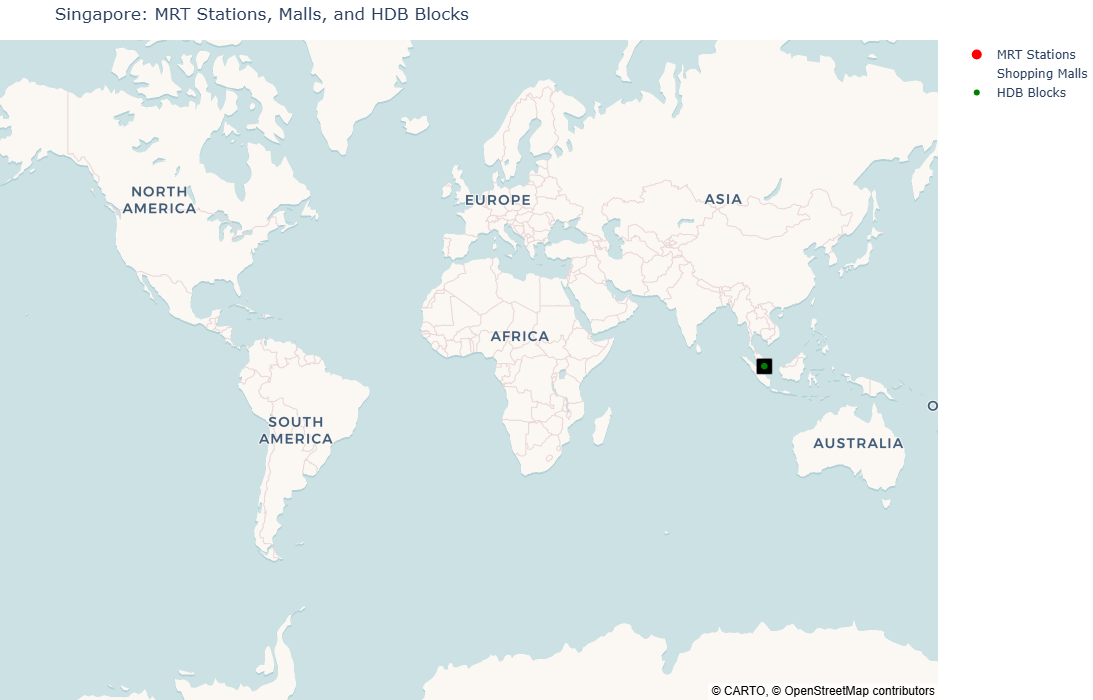

In [15]:
import plotly.graph_objects as go

fig = go.Figure()

# Add MRT stations
fig.add_trace(go.Scattermap(
    lat=mrt_geolocations['latitude'],
    lon=mrt_geolocations['longitude'],
    mode='markers',
    marker=dict(size=10, color='red'),
    text=mrt_geolocations['name'],
    name='MRT Stations',
    hovertemplate='<b>MRT: %{text}</b><extra></extra>'
))

# Add shopping malls
fig.add_trace(go.Scattermap(
    lat=mall_geolocations['latitude'],
    lon=mall_geolocations['longitude'],
    mode='markers',
    marker=dict(size=12, color='blue', symbol='square'),
    text=mall_geolocations['name'],
    name='Shopping Malls',
    hovertemplate='<b>Mall: %{text}</b><extra></extra>'
))

# Add HDB blocks
fig.add_trace(go.Scattermap(
    lat=hdb_geolocations['latitude'],
    lon=hdb_geolocations['longitude'],
    mode='markers',
    marker=dict(size=6, color='green'),
    text=hdb_geolocations['block'] + ' ' + hdb_geolocations['street_name'],
    name='HDB Blocks',
    hovertemplate='<b>HDB: %{text}</b><extra></extra>'
))

# Update layout with Singapore center and map style
fig.update_layout(
    title='Singapore: MRT Stations, Malls, and HDB Blocks',
    mapbox=dict(
        style='open-street-map',  # Free option, no API key needed
        center=dict(lat=1.3521, lon=103.8198),
        zoom=10
    ),
    width=1000,
    height=700,
    margin=dict(r=0, t=40, l=0, b=0)
)

fig.show()